# Create the Bayesian Network

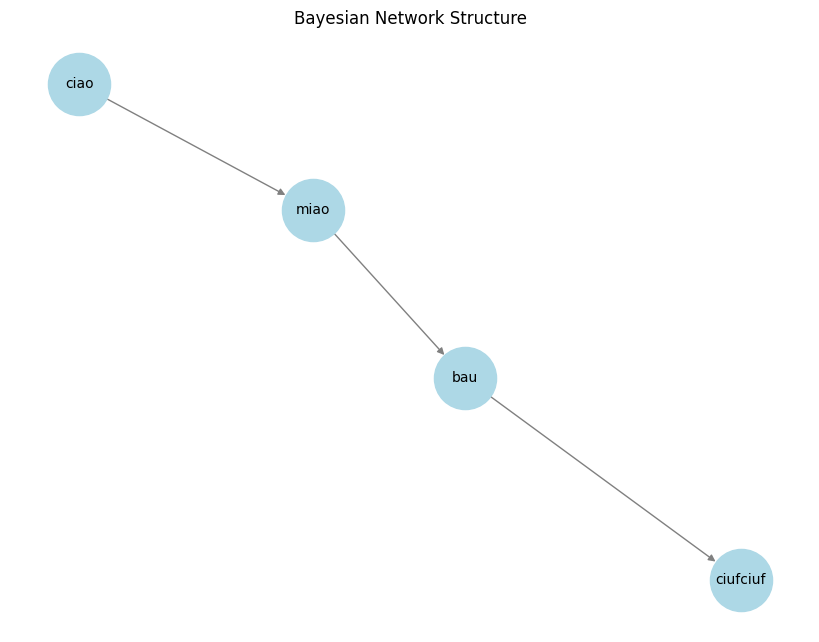

In [11]:

from pgmpy.models import BayesianNetwork
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Build the network 
network_structure = [
    ("ciao", "miao"),   
    ("miao", "bau"),   
    ("bau", "ciufciuf")
]
BN = BayesianNetwork(network_structure)

# Plot its graph
G = nx.DiGraph()
G.add_edges_from(BN.edges())
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # we can try also different layouts (circle, ...)
nx.draw(G, pos, 
            with_labels=True, 
            node_color='lightblue', 
            edge_color='gray', 
            node_size=2000, 
            font_size=10
        )
plt.title("Bayesian Network Structure")
plt.show()

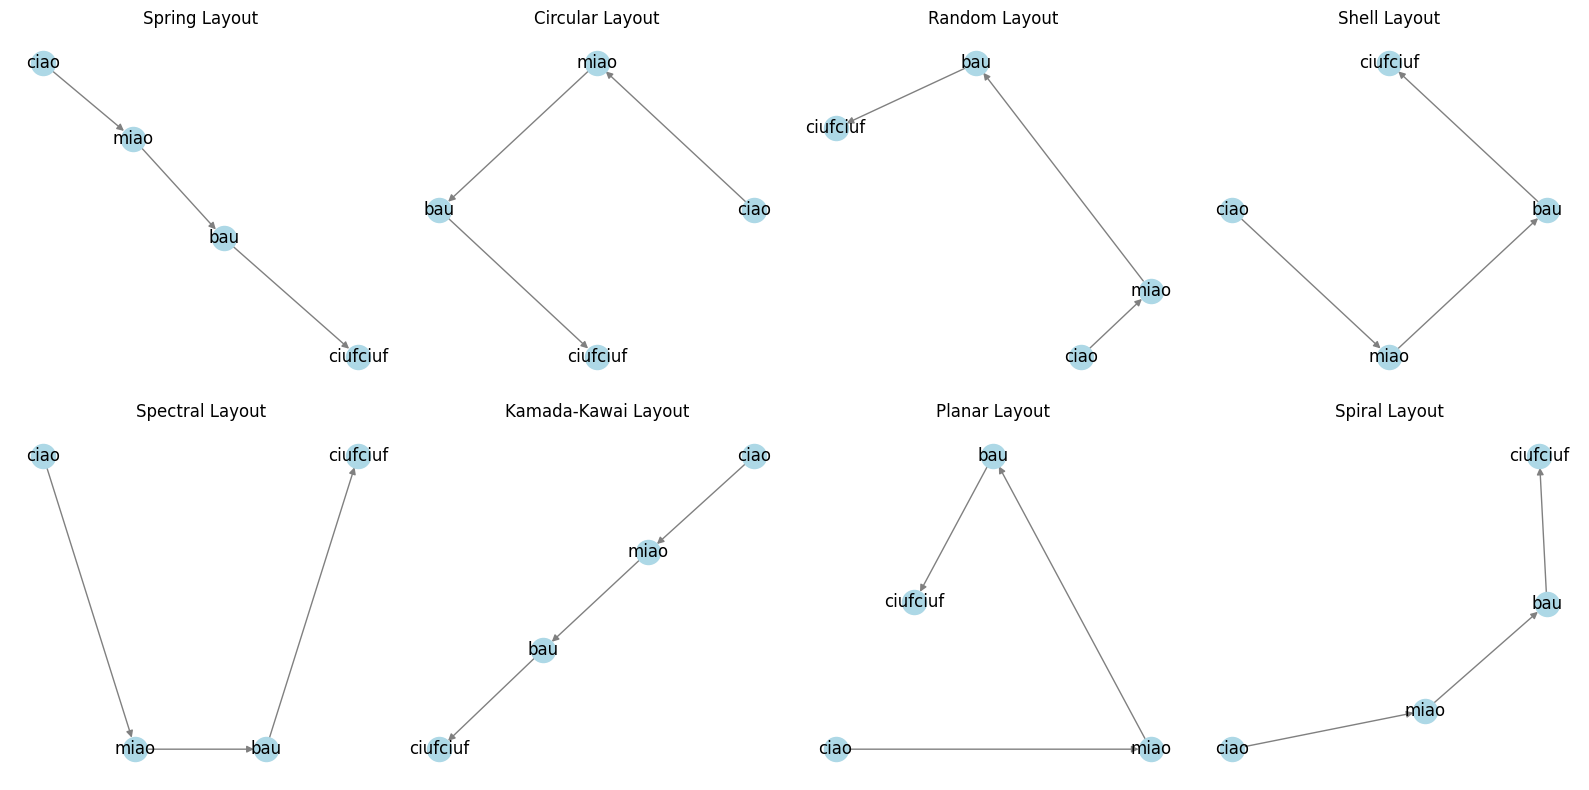

In [ ]:
# Check all the layouts

# Define all available layouts
layouts = {
    "Spring Layout": nx.spring_layout(G),
    "Circular Layout": nx.circular_layout(G),
    "Random Layout": nx.random_layout(G),
    "Shell Layout": nx.shell_layout(G),
    "Spectral Layout": nx.spectral_layout(G),
    "Kamada-Kawai Layout": nx.kamada_kawai_layout(G),
    "Spiral Layout": nx.spiral_layout(G),
    # ... and more to add ...
}

# Create subplots to visualize each layout
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for ax, (name, pos) in zip(axes, layouts.items()):
    if pos is not None:
        ax.set_title(name)
        nx.draw(G, pos, ax=ax, with_labels=True, node_color="lightblue", edge_color="gray")

plt.tight_layout()
plt.show()

# Fit the network with the processed data

In [ ]:
# data = pd.read_csv("./dataset_cleaned.csv")

from pgmpy.estimators import MaximumLikelihoodEstimator, ExpectationMaximization, BayesianEstimator
# BN.fit(data, estimator=...)

# Explore some features

In [ ]:
# Markov blanket of a node to understand which variables directly influence that node
node = "NodeName"
print(f"Markov Blanket of {node}:",BN.get_markov_blanket(node))

...

NameError: name 'data' is not defined

# Evaluate the model

In [ ]:
from pgmpy.estimators import PC, HillClimbSearch, BicScore
from pgmpy.metrics.metrics import SHD, correlation_score, fisher_c, implied_cis, log_likelihood_score, structure_score

hc = HillClimbSearch(data)
learned_model = hc.estimate(scoring_method=BicScore(data))  # Estimate a comparison model

# Structural difference score
# => SHD is defined as total number of basic operations: adding edges, removing edges, 
# and reversing edges required to transform one graph to the other. 
# It is a symmetrical measure.
shd_value = SHD(true_model, learned_model)

# Distribution comparison
# => Function to score how well the model structure represents the correlations in 
# the data. The model doesn’t need to be parameterized for this score.
correlation = correlation_score(true_model, learned_model, data)

# Returns a p-value for testing whether the given data is 
# faithful to the model structure’s constraints.
fisher_score = fisher_c(true_model, data)

# Tests the implied Conditional Independences (CI) of the DAG in the given data. 
# Each missing edge in a model structure implies a CI statement. If the distribution 
# of the data is faithful to the constraints of the model structure, these CI statements 
# should hold in the data as well. This function runs statistical tests for each implied 
# CI on the given data.
cis = implied_cis(true_model)

# The log-likelihood measure can be used to check how well the specified model describes 
# the data. This method requires the parameters of the model to be specified as well. 
# !! Direct interpretation of this score is difficult but can be used to compare the fit of two or more models. !!
# A higher score means ab better fit.
log_likelihood = log_likelihood_score(true_model, data)

# Uses the standard model scoring methods to give a score for each structure. 
# The score doesn’t have very straight forward interpretebility but can be used to 
# compare different models. A higher score represents a better fit.
structure_s = structure_score(true_model, data, scoring_method=BicScore(data))

# Queries

In [ ]:
from pgmpy.inference import VariableElimination
exact_infer = VariableElimination(BN)
exact_result = exact_infer.query(   # P(C|A=1)
    variables=['C'], 
    evidence={'A': 1}
)

from pgmpy.sampling import BayesianModelSampling
sampler = BayesianModelSampling(BN)
samples = sampler.forward_sample(size=10000)
filtered_samples = samples[samples['A'] == 1]
approx_result = filtered_samples['C'].value_counts(normalize=True)

print("Exact result: ", exact_result)
print("Approx result: ", approx_result)

Ellipsis